In [1]:
import torch
from torchzero.benchmarks.restoration import Restoration
from torchzero.optim.gridsearch import GridSearch, SequentialSearch
from image_descent import ImageDescent

import matplotlib.pyplot as plt
image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

# Grid search
This simply tries all possible parameter combinations

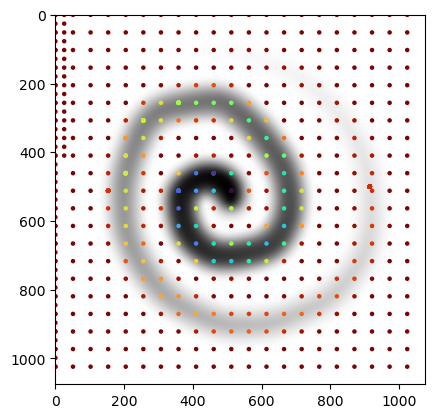

In [6]:
descent = ImageDescent(image, coords=(915, 500))
losses = []
optimizer = GridSearch(descent.parameters(), (-1,1), 0.1)
for i in range(500):
    print(i, end='\r')
    optimizer.step(descent.step_nograd)
    loss = descent.step_nograd()
    losses.append(loss)
plt.imshow(descent.image, cmap='gray')
plt.scatter(*zip(*descent.get_coord_history_pixels()), c=descent.loss_history, cmap='turbo', s=5)

# Sequential search
This fits each parameter one by one, and repeats the process from the best position once done

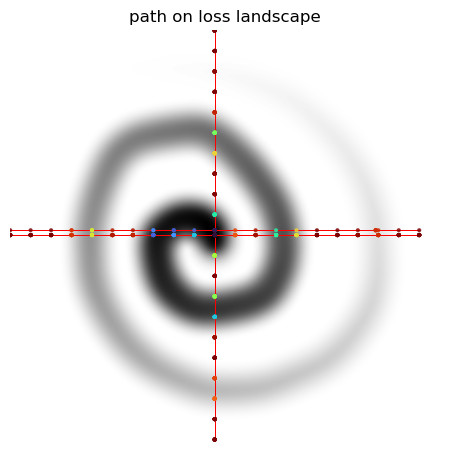

In [4]:
descent = ImageDescent(image, coords=(915, 500))
losses = []
optimizer = SequentialSearch(descent.parameters(), 0.1, (-1,1))
for i in range(500):
    print(i, end='\r')
    optimizer.step(descent.step_nograd)
    loss = descent.step_nograd()
    losses.append(loss)
descent.plot_path()